In [1]:
import torch
import torchvision
from model import Autoencoder
from train_dir import train
from torchvision import transforms
from torch import optim,nn


c:\Users\91963\.conda\envs\pytorch-G\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = 'cuda:0' if torch.cuda.is_available( ) else 'cpu'
train_size = 0.9
lr = 1e-3
eps = 1e-8
batch_size = 256
epochs = 30

In [4]:
def mnist(train_part , transform= None):
    dataset = torchvision.datasets.MNIST('.',download=True,transform= transform)
    train_part = int(train_part*len(dataset))
    train_dataset,test_dataset = torch.utils.data.random_split(dataset,[train_part,len(dataset)-train_part])
    return train_dataset,test_dataset

In [5]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset , test_dataset = mnist(train_size,transform)
train_dataLoader = torch.utils.data.DataLoader(train_dataset,drop_last=True,batch_size=batch_size,shuffle=True)
test_dataLoader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)# why we need batch size 1 for test data set
dataLoaders = (train_dataLoader,test_dataLoader)

In [6]:
def plotn(n, data, noisy=False, super_res=None):
    fig, ax = plt.subplots(1, n)
    for i, z in enumerate(data):
        if i == n:
            break
        preprocess = z[0].reshape(1, 28, 28) if z[0].shape[1] == 28 else z[0].reshape(1, 14, 14) if z[0].shape[1] == 14 else z[0]
        if super_res is not None:
            _transform = transforms.Resize((int(preprocess.shape[1] / super_res), int(preprocess.shape[2] / super_res)))
            preprocess = _transform(preprocess)

        if noisy:
            shapes = list(preprocess.shape)
            preprocess += noisify(shapes)

        ax[i].imshow(preprocess[0])
    plt.show()
        

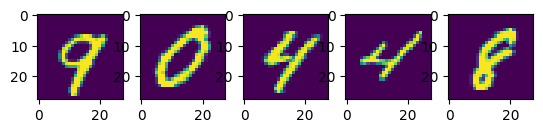

In [7]:
plotn(5, train_dataset)


In [8]:
def noisify(shapes):
    return np.random.normal(loc=0.5, scale=0.3, size=shapes)


In [9]:
model = Autoencoder().to(device)
optim = optim.Adam(model.parameters(),lr =lr,eps =eps)
loss_fn = nn.BCELoss()

In [10]:
noisy_tensor = torch.FloatTensor(noisify([256, 1, 28, 28])).to(device)
test_noisy_tensor = torch.FloatTensor(noisify([1, 1, 28, 28])).to(device)
noisy_tensors = (noisy_tensor, test_noisy_tensor)

In [11]:
train(dataLoaders,model,loss_fn,optim,100,device,noisy=noisy_tensors)


  0%|          | 0/100 [00:00<?, ?it/s]

c:\Users\91963\.conda\envs\pytorch-G\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:1009.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 100/100 [1:17:45<00:00, 46.65s/it, train_loss:=0.116, test_loss:=0]


In [22]:
PATH ="model.pt"

torch.save(model.state_dict(), PATH)

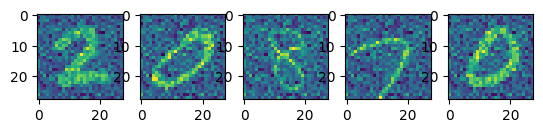

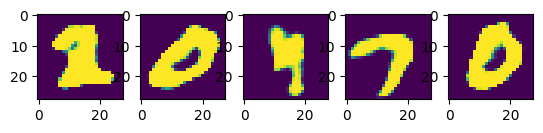

In [24]:
model.eval()
predictions = []
noise = []
plots = 5
for i, data in enumerate(test_dataset):
    if i == plots:
        break
    shapes = data[0].shape
    noisy_data = data[0] + test_noisy_tensor[0].detach().cpu()
    noise.append(noisy_data)
    predictions.append(model(noisy_data.to(device).unsqueeze(0)).detach().cpu())
plotn(plots, noise)
plotn(plots, predictions)

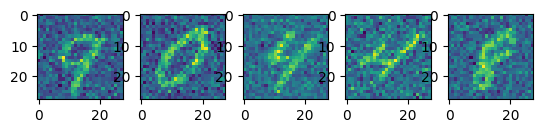

In [13]:
plotn(5, train_dataset, noisy=True)


In [25]:
model = Autoencoder().to(device)
model.load_state_dict(torch.load(PATH))
model.eval()

Autoencoder(
  (encode): Encoder(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (maxpooling1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (maxpooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (maxpooling3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(1, 1), dilation=1, ceil_mode=False)
    (relu): ReLU()
  )
  (decode): Decoder(
    (conv1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (up1): Upsample(scale_factor=(2.0, 2.0), mode='nearest')
    (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (up2): Upsample(scale_factor=(2.0, 2.0), mode='nearest')
    (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (up3): Upsample(scale_factor=(2.0, 2.0),

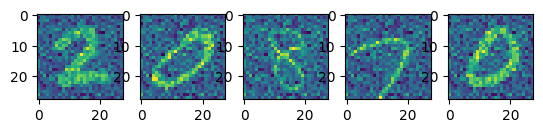

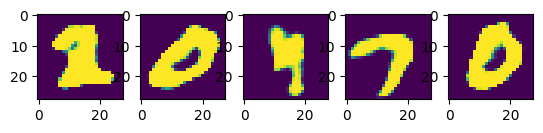

In [26]:
model.eval()
predictions = []
noise = []
plots = 5
for i, data in enumerate(test_dataset):
    if i == plots:
        break
    shapes = data[0].shape
    noisy_data = data[0] + test_noisy_tensor[0].detach().cpu()
    noise.append(noisy_data)
    predictions.append(model(noisy_data.to(device).unsqueeze(0)).detach().cpu())
plotn(plots, noise)
plotn(plots, predictions)